In [ ]:
Inteligentná analýza údajov

Prvá časť semestrálneho projektu: Prieskumná analýza

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [71]:
#načítanie datasetu
filename = "Dataset/other_train.csv"
df = pd.read_csv(filename)
df_nwd = df

In [65]:
nazvy = ['mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose', 'mean_oxygen',
         'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']

#vytvorenie stĺpcov
for nazov in nazvy:
    df[nazov] = pd.Series('', index=df.index)

#funkcia pre naformatovanie dat v medical_info a priradenie dát do novovytvorených stĺpcov
def medinfofun(text):
    if "{" in str(text):
        text = text.translate({ord(i): None for i in "{}'"})
        text = text.split(',')
        new = []
        names = [['mean_glucose'], ['std_glucose'], ['kurtosis_glucose'], ['skewness_glucose'], ['mean_oxygen'],
                 ['std_oxygen'], ['kurtosis_oxygen'], ['skewness_oxygen']]
        for x in text:
            new.append(x.split(':'))
        for a in range(len(new)):
            names[a].append(new[a][1])

        return pd.Series([names[0][1], names[1][1], names[2][1], names[3][1], names[4][1],
                          names[5][1], names[6][1], names[7][1]])
    return pd.Series('0')


df[['mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose', 'mean_oxygen',
    'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']] = df.medical_info.apply(medinfofun).astype(float)

df = df.drop('medical_info', 1)

In [72]:
df_nwd.head(10)

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Charles Foster,"475 Chris Cliff\r\nNew Aaron, MN 28762",Black,Married-civ-spouse,?,f,1.0,Husband,0.0,Preschool,293385.0,0.0,<=50K,"{'mean_glucose':'115.171875','std_glucose':'55...",United-States,30.0,0.0,?
1,1,Kelly Presha,"868 Victoria Pine\r\nSarahmouth, HI 89920",White,Married-civ-spouse,Craft-repair,f,9.0,Husband,0.0,HS-grad,189922.0,1.0,<=50K,"{'mean_glucose':'8.75','std_glucose':'30.95838...",United-States,40.0,0.0,Private
2,2,Fred Morris,"986 Jessica Lodge\r\nLake Maryland, GA 86175",White,Divorced,Adm-clerical,NaN,9.0,Not-in-family,0.0,HS-grad,198388.0,0.0,<=50K,"{'mean_glucose':'103.734375','std_glucose':'45...",United-States,40.0,0.0,Private
3,3,Lance Black,"5504 Cook Pass Suite 642\r\nJosephside, AL 44758",White,Married-civ-spouse,Farming-fishing,f,4.0,Husband,0.0,7th-8th,184335.0,0.0,<=50K,"{'mean_glucose':'111.15625','std_glucose':'45....",United-States,30.0,0.0,Self-emp-not-inc
4,4,Joseph Nance,"2440 Haynes Ferry\r\nSamuelstad, RI 51752",White,Married-civ-spouse,Tech-support,F,9.0,Wife,0.0,HS-grad,153451.0,0.0,>50K,"{'mean_glucose':'99.4296875','std_glucose':'43...",United-States,40.0,1887.0,State-gov
5,5,Randy Maynard,"642 Williams Pines Apt. 334\r\nPowellland, NV ...",White,Never-married,Adm-clerical,f,10.0,Own-child,0.0,Some-college,366929.0,1.0,<=50K,"{'mean_glucose':'83.3671875','std_glucose':'41...",United-States,35.0,0.0,Private
6,6,David Arfman,"655 Todd Stream Suite 571\r\nEast Nancyfort, T...",White,Married-civ-spouse,Exec-managerial,FALSE,16.0,Husband,15024.0,Doctorate,188386.0,0.0,>50K,"{'mean_glucose':'128.609375','std_glucose':'47...",United-States,60.0,0.0,Private
7,7,Jason Webster,"648 David Mountain\r\nJohnstonside, NH 41628",White,Divorced,Other-service,f,10.0,Not-in-family,0.0,Some-college,143312.0,1.0,<=50K,"{'mean_glucose':'34.8984375','std_glucose':'-3...",United-States,60.0,0.0,Private
8,8,Maurice Riley,"58487 Schneider Street\r\nGriffinfurt, RI 56689",White,Married-civ-spouse,Adm-clerical,NaN,10.0,Wife,0.0,NaN,221977.0,0.0,>50K,NaN,United-States,40.0,0.0,Private
9,9,Norbert Herring,"7560 Bobby Fall Suite 330\r\nJulieport, OH 01896",White,Divorced,Sales,f,9.0,Not-in-family,0.0,HS-grad,162606.0,1.0,<=50K,"{'mean_glucose':'48.328125','std_glucose':'483...",United-States,35.0,0.0,Private


### Základný opis dát spolu s ich charakteristikami

In [52]:
pocet_riadkov, pocet_stlpcov = df.shape
print("Počet záznamov:",pocet_riadkov)
print("Počet atribútov:",pocet_stlpcov)

Počet záznamov: 3983
Počet atribútov: 26


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3983 non-null   int64  
 1   name              3983 non-null   object 
 2   address           3983 non-null   object 
 3   race              3962 non-null   object 
 4   marital-status    3966 non-null   object 
 5   occupation        3959 non-null   object 
 6   pregnant          3967 non-null   object 
 7   education-num     3976 non-null   float64
 8   relationship      3972 non-null   object 
 9   capital-gain      3965 non-null   float64
 10  education         3962 non-null   object 
 11  fnlwgt            3964 non-null   float64
 12  class             3963 non-null   float64
 13  income            3963 non-null   object 
 14  native-country    3966 non-null   object 
 15  hours-per-week    3968 non-null   float64
 16  capital-loss      3959 non-null   float64


In [60]:
#popisanie čiselných atribútov

include =['float', 'int'] 
desc = df.describe(include = include)
desc

,education-num,capital-gain,fnlwgt,class,hours-per-week,capital-loss,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
count,3976.000000,3965.000000,3.964000e+03,3963.000000,3968.000000,3959.000000,3587.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000
mean,10.068913,1165.191173,1.910926e+05,0.255362,40.384325,88.021723,100.900239,72.643784,0.948002,4.201711,18.519389,31.187359,7.407227,91.138720
std,2.660549,7991.492407,1.075397e+05,0.436120,12.498116,411.623025,34.080150,1454.257388,1.607876,9.652821,34.864148,22.318089,4.808268,108.297251
min,1.000000,0.000000,1.989900e+04,0.000000,1.000000,0.000000,0.000000,-7110.621457,-1.641515,-1.755332,0.213211,7.370432,-2.597872,-1.976976
25%,9.000000,0.000000,1.189220e+05,0.000000,40.000000,0.000000,87.402344,39.434675,0.072237,-0.119656,2.065635,15.049218,3.637833,12.867870
50%,10.000000,0.000000,1.793445e+05,0.000000,40.000000,0.000000,110.664062,45.936325,0.310784,0.372981,3.237458,20.594663,7.780317,68.338302
75%,13.000000,0.000000,2.351010e+05,1.000000,45.000000,0.000000,124.089844,51.021751,0.773769,2.080120,12.639632,43.237478,10.259026,126.895481
max,16.000000,99999.000000,1.484705e+06,1.000000,99.000000,4356.000000,189.734375,7678.445784,8.069522,68.101622,217.371238,110.642211,34.539844,1191.000837


In [61]:
#popisanie atribútov typu object

include =['object'] 
desc = df.describe(include = include)
desc

,name,address,race,marital-status,occupation,pregnant,relationship,education,income,native-country,workclass
count,3983,3983,3962,3966,3959,3967,3972,3962,3963,3966,3968
unique,3933,3933,5,7,14,6,6,16,2,39,9
top,Shaun Juckett,"578 Edward Roads\r\nHornland, MI 25975",White,Married-civ-spouse,Prof-specialty,f,Husband,HS-grad,<=50K,United-States,Private
freq,3,3,3366,1852,524,3492,1636,1228,2964,3560,2767


In [94]:
standard_deviation = df['hours-per-week'].std()
average = df['hours-per-week'].mean()
med = df['hours-per-week'].median()
print("Odpracované hodiny\n")
print("Štandardná odchýlka:",math.floor(standard_deviation * 100)/100.0,
      "\nPriemer:",math.floor(average * 100)/100.,
      "\nMedian:",med)

Odpracované hodiny

Štandardná odchýlka: 12.49 
Priemer: 40.38 
Median: 40.0


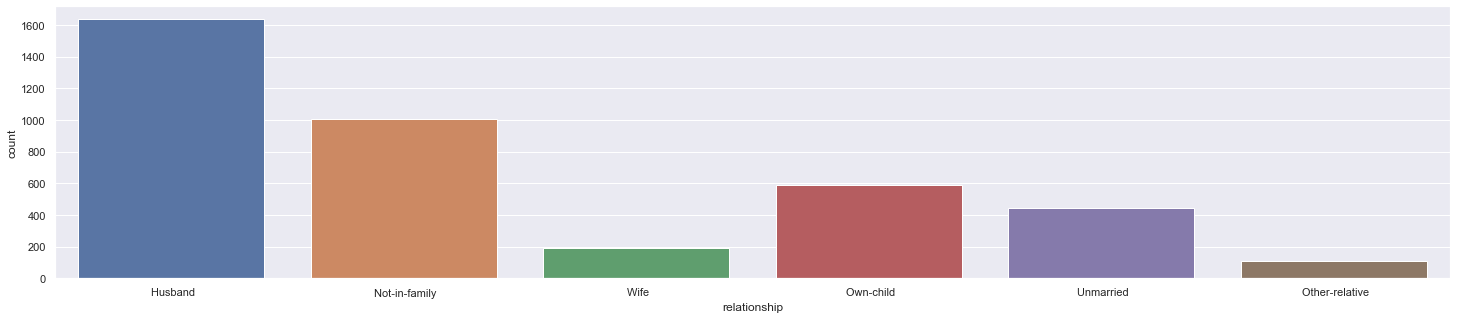

In [79]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,5))
ax = sns.countplot(x='relationship', data=df)